# Investigating Fandango Movie Ratings

---

## 1. Introduction

In 2015, Walt Hickey from FiveThirtyEight published a [popular article](https://fivethirtyeight.com/features/fandango-movies-ratings/) where he presented strong evidence to suggest that [Fandango's movie rating system](https://www.fandango.com/) was biased and dishonest. 

The objective of this project is to **determine whether there is any disparity between Fandango's ratings for popular movies in 2015 and 2016**, by analyzing datasets on Fandango's rating systems for:

- popular movies released in 2015, available publicly on [Hickey's GitHub page](https://github.com/fivethirtyeight/data/tree/master/fandango) and
- popular movies released in 2016 and 2017, available publicly on [Dataquest's GitHub page](https://github.com/mircealex/Movie_ratings_2016_17)

---

## 2. Open and Clean the Data

We will start by reading and inspecting both datasets.

In [1]:
import pandas as pd

# Read first dataset
previous = pd.read_csv('fandango_score_comparison.csv')
previous.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [2]:
# Read second dataset
after = pd.read_csv('movie_ratings_16_17.csv')
after.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


Since there is information pertaining to other movie rating websites (e.g. IMDB, RottenTomatoes), we will only isolate the columns relevant to Fandago's ratings for further analysis.

In [3]:
fandango_previous = previous.loc[:, ['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]
fandango_previous.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [4]:
fandango_after = after.loc[:, ['movie', 'year', 'fandango']]
fandango_after.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


We also notice that some movies in the datasets were not released in 2015 and 2016, hence we will isolate only the sample points that belong to our populations of interest.

In [5]:
# Movies released in 2015
fandango_previous.loc[:, 'Year'] = fandango_previous.loc[:, 'FILM'].str[-5:-1]
fandango_2015 = fandango_previous[fandango_previous['Year'] == '2015']

print('Year:   Number of Movies')
print(fandango_2015['Year'].value_counts())

print('\n')

# Movies released in 2016
fandango_2016 = fandango_after[fandango_after['year'] == 2016]

print('Year:   Number of Movies')
print(fandango_2016['year'].value_counts())

Year:   Number of Movies
2015    129
Name: Year, dtype: int64


Year:   Number of Movies
2016    191
Name: year, dtype: int64


---

## 3. Analyze the Data

We can now start analyzing the two samples above, to ascertain if there is any difference between Fandango's ratings for popular movies in 2015 and 2016.

Firstly, let's do a high-level comparison between the shapes of the distributions of movie ratings for both samples.

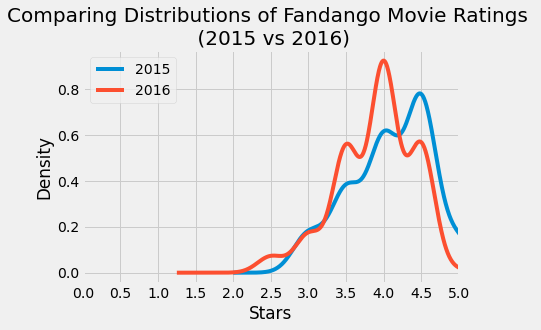

In [6]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('fivethirtyeight')

# Kernel density plots for 2015 and 2016 distributions
fandango_2015['Fandango_Stars'].plot.kde(label = '2015')
fandango_2016['fandango'].plot.kde(label = '2016')

plt.title('Comparing Distributions of Fandango Movie Ratings \n (2015 vs 2016)', fontsize = 20)
plt.legend()

plt.xlabel('Stars')
plt.xlim(0, 5)
plt.xticks(np.arange(0, 5.5, 0.5))

plt.show()

- Both distributions are strongly left skewed, which suggests that that popular movies tend to get very high fan ratings on Fandango.
- The 2016 distribution is slightly to the left of the 2015 distribution, hence the ratings in 2016 were lower in general as compared to 2015.

We can delve deeper to analyze and compare the relative frequencies of ratings in 2015 and 2016.

In [7]:
# Frequency distribution of 2015 movie ratings
print('Rating: Relative Frequency (%)')
print(fandango_2015['Fandango_Stars'].value_counts(normalize = True).sort_index() * 100)

print('\n')

# Frequency distribution of 2016 movie ratings
print('Rating: Relative Frequency (%)')
print(fandango_2016['fandango'].value_counts(normalize = True).sort_index() * 100)

Rating: Relative Frequency (%)
3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64


Rating: Relative Frequency (%)
2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64


As compared to 2015:
- The percentage of movies in 2016 with very high ratings (4.5 or 5 stars) has dropped significantly.
- The percentage of movies in 2016 with high ratings (3 or 3.5 stars) has increased.
- The minimum rating of movies in 2016 has been lowered from 3 stars to 2.5 stars.

We will confirm this by visualising the mean, median and mode statistics for the 2015 and 2016 movie rating distributions.

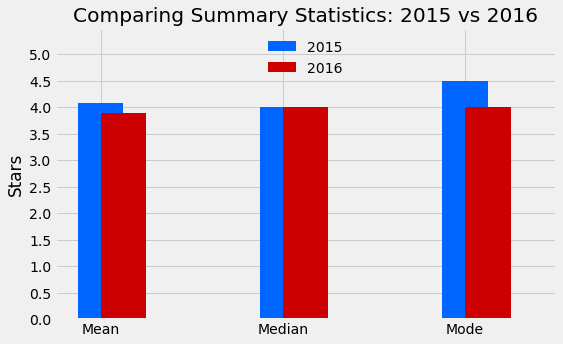

In [8]:
# Statistics for 2015 movies 
mean_2015 = fandango_2015['Fandango_Stars'].mean()
median_2015 = fandango_2015['Fandango_Stars'].median()
mode_2015 = fandango_2015['Fandango_Stars'].mode()[0]

# Statistics for 2016 movies
mean_2016 = fandango_2016['fandango'].mean()
median_2016 = fandango_2016['fandango'].median()
mode_2016 = fandango_2016['fandango'].mode()[0]

# Combine summary statistics in a dataframe
summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['Mean', 'Median', 'Mode']

# Plot grouped bar plot to compare summary statistics 
plt.style.use('fivethirtyeight')

summary['2015'].plot.bar(color = '#0066FF', align = 'center', label = '2015', width = 0.25)
summary['2016'].plot.bar(color = '#CC0000', align = 'edge', label = '2016', width = 0.25, rot = 0, figsize = (8, 5))

plt.title('Comparing Summary Statistics: 2015 vs 2016')
plt.legend(framealpha = False, loc = 'upper center')

plt.ylabel('Stars')
plt.ylim(0, 5.5)
plt.yticks(np.arange(0, 5.5, 0.5))

plt.show()

- The mean rating was lower in 2016 by approximately 0.2, which equates to a drop of around 5% relative to the mean rating in 2015.
- The median rating is the same in 2015 and 2016.
- The mode has decreased from 4.5 stars in 2015 to 4 stars in 2016.

Therefore, **on average, popular movies released in 2016 were rated lower than popular movies released in 2015 on Fandango**.

---

## 6. Additional Analysis

Although Fandango has tweaked its rating system to reduce biasness, we observed that the distribution in 2016 is still skewed towards high (3 or 3.5 stars) and very high (4 or 4.5 stars) ratings. However, this information may not be useful to a user since most of the movies are highly rated. 

For a movie rating to be indicative and informative, we expect it to follow a **normal distribution** with a few low ratings, mostly average ratings and a few high ratings. This will help the user to differentiate between different movies and decide which ones to watch. 

**To determine which rating system is the best**, let's isolate these additional columns from the 2016 movie ratings dataset, for comparison against the Fandango ratings:

| Column | Description |
| - | - |
| fandango | the Fandango rating of the movie (user score) |
| n_metascore | the Metacritic rating normalized to a 0-5 scale |
| n_imdb | the IMDB rating normalized to a 0-5 scale |
| n_tmeter | the Rotten Tomatoes rating normalized to a 0-5 scale |

In [9]:
after_2016 = after[after['year'] == 2016].loc[:, ['movie', 'year', 'fandango', 'n_metascore', 'n_imdb', 'n_tmeter']]
after_2016.head()

,movie,year,fandango,n_metascore,n_imdb,n_tmeter
0,10 Cloverfield Lane,2016,3.5,3.80,3.60,4.50
1,13 Hours,2016,4.5,2.40,3.65,2.50
2,A Cure for Wellness,2016,3.0,2.35,3.30,2.00
4,A Hologram for the King,2016,3.0,2.90,3.05,3.50
5,A Monster Calls,2016,4.0,3.80,3.75,4.35


We can now visualise and compare the distributions below.

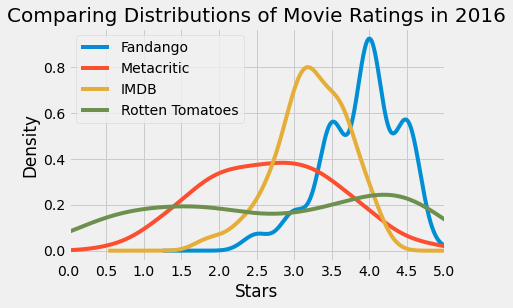

In [10]:
after_2016['fandango'].plot.kde(label = 'Fandango')
after_2016['n_metascore'].plot.kde(label = 'Metacritic')
after_2016['n_imdb'].plot.kde(label = 'IMDB')
after_2016['n_tmeter'].plot.kde(label = 'Rotten Tomatoes')

plt.title('Comparing Distributions of Movie Ratings in 2016', fontsize = 20)
plt.legend()

plt.xlabel('Stars')
plt.xlim(0, 5)
plt.xticks(np.arange(0, 5.5, 0.5))

plt.show()

- The distributions of Fandango and IMDB ratings are both left skewed. 
- However, IMDB tends to give out high ratings (3 to 3.5 stars) for popular movies, whereas the largest percentage for Fandango ratings is 4 stars.
- The distribution of **Metacritic ratings follows a normal distribution**, with an average of around 2.5 stars.
- The distribution of Rotten Tomatoes ratings is relatively uniform, with a slight peak at 4 stars. 

Therefore, **we will recommend the Metacritic movie ratings** instead of Fandango, IMDB and Rotten Tomatoes.

--- 

## 7. Conclusion

- **On average, popular movies released in 2016 were rated lower than popular movies released in 2015**. This could be due to Fandango optimising their rating system after Hickey's analysis was published.
- We **recommend to use the Metacritic movie ratings which are more indicative and informative** since they follow a normal distribution